# Generate Data for Overview

In [1]:
import sys
sys.path.append("..")

In [35]:
!python ../src/simulate_data.py -n 5000 -m 5 --size 10 -p 3 -k 0 --cov 0.0001 -o ../data/overview/sim -l 0 -a 0.01 -b 0.01 -s 2027

Namespace(n=5000, m=5, p=3, k=0, o='../data/overview/sim', s=2027, size=10, d=0, cov=0.0001, a=0.01, b=0.01, ado=15, maxcn=8, readthreshold=5, vafthreshold=0.1, l=0.0, v=False)
n_mutation_groups: 5 n_cells: 5000 n_leaves: 4
/Users/samin/workspace/scWGS-Tumor-Phylogeny/notebooks/../src/simulate_data.py:182: RuntimeWarning: invalid value encountered in divide
  VAF_mat = Vcount / Rtotal
/Users/samin/workspace/scWGS-Tumor-Phylogeny/notebooks/../src/simulate_data.py:295: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(df.T.values, vert=False, labels=df.index)
/Users/samin/workspace/scWGS-Tumor-Phylogeny/notebooks/../src/simulate_data.py:295: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(df.T.values, vert=False, labels=df.ind

In [ ]:
# !python ../src/data_processors/kmeans_clustering_for_scope.py -i ../data/overview/sim \
#      -o ../data/ --start_k 5 --end_k 5

/Users/samin/workspace/scWGS-Tumor-Phylogeny/.venv/lib/python3.13/site-packages/sklearn/base.py:1365: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/samin/workspace/scWGS-Tumor-Phylogeny/.venv/lib/python3.13/site-packages/sklearn/base.py:1365: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/samin/workspace/scWGS-Tumor-Phylogeny/.venv/lib/python3.13/site-packages/sklearn/base.py:1365: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/samin/workspace/scWGS-Tumor-Phylogeny/.venv/lib/python3.13/site-packages/sklearn/base.py:1365: ConvergenceWarning: Number of distinct clusters (4) found smaller than

In [69]:
import pandas as pd
import numpy as np
from src.solve_ilp_3 import solve_cncff

In [95]:
F_hi = pd.read_csv("../data/overview/F_plus_changed.csv")
F_lo = pd.read_csv("../data/overview/F_minus_changed.csv")

F_hi.index = list("ABC")
F_lo.index = list("ABC")

F_hi, F_lo

(   cluster_id    0    1    2    3
 A           0  0.0  0.0  1.0  0.7
 B           1  0.0  0.0  1.0  0.0
 C           2  0.2  1.0  0.0  0.0,
    cluster_id    0    1    2    3
 A           0  0.0  0.0  0.4  0.5
 B           1  0.0  0.0  1.0  0.0
 C           2  0.1  0.8  0.0  0.0)

In [99]:
solutions, _, _ =  solve_cncff(F_plus=F_hi, F_minus=F_lo, n_clones=5, cluster_weights=[1] * 6)

Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2687964
Academic license 2687964 - for non-commercial use only - registered to sa___@iict.buet.ac.bd
Set parameter TimeLimit to value 600
Set parameter PoolSearchMode to value 2
Set parameter PoolSolutions to value 10
Set parameter PoolGap to value 0
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (mac64[arm] - Darwin 24.6.0 24G90)

CPU model: Apple M4
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Non-default parameters:
TimeLimit  600
PoolSearchMode  2
PoolGap  0

Academic license 2687964 - for non-commercial use only - registered to sa___@iict.buet.ac.bd
Optimize a model with 964 rows, 340 columns and 2701 nonzeros
Model fingerprint: 0x97be0305
Model has 30 quadratic constraints
Variable types: 105 continuous, 235 integer (235 binary)
Coefficient statistics:
  Matrix range     [1e-01, 2e+01]
  QMatrix range    [1e+00, 1e+00]
  QLMatrix range   [2e+01, 2e+01]
  Objecti

In [97]:
from src.phylogeny_utils import *
import os

In [98]:
output_prefix = "../data/overview"

unique_solutions = []
solution_strs = {}


for i, solution in enumerate(solutions):
    try:
        solution_path = f"{output_prefix}/solution_{i}"
        os.makedirs(solution_path, exist_ok=True)

        X, B, U, F, G = solution
        
        X.to_csv(f"{solution_path}/X.csv")
        B.to_csv(f"{solution_path}/B.csv")
        U.to_csv(f"{solution_path}/U.csv")
        F.to_csv(f"{solution_path}/F.csv")
        G.to_csv(f"{solution_path}/G.csv")

        solT_mut, _ = generate_perfect_phylogeny(B)
        fixed_T = add_clusters_to_clonal_T(solT_mut, X, G, B)
        T_code = canonical_form(fixed_T)

        draw_clone_tree(fixed_T, f"{solution_path}/T.svg")

        if T_code not in solution_strs:
            print(i)
            solution_strs[T_code] = i
            unique_solutions.append(solution)
        else:
            print(i, 'same as', solution_strs[T_code])
        
    except Exception as e:
        print(e)

/Users/samin/workspace/scWGS-Tumor-Phylogeny/notebooks/../src/phylogeny_utils.py:180: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/Users/samin/workspace/scWGS-Tumor-Phylogeny/notebooks/../src/phylogeny_utils.py:180: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


0
1
2
3


/Users/samin/workspace/scWGS-Tumor-Phylogeny/notebooks/../src/phylogeny_utils.py:180: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/Users/samin/workspace/scWGS-Tumor-Phylogeny/notebooks/../src/phylogeny_utils.py:180: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


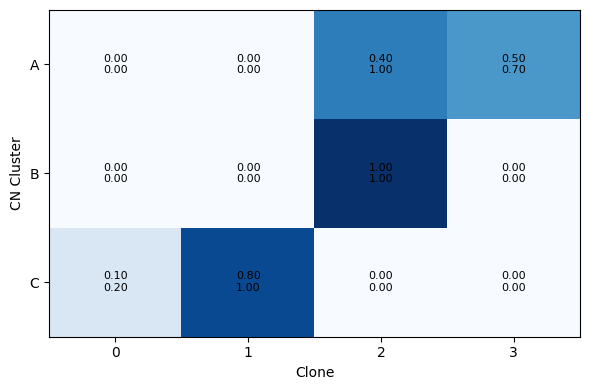

In [100]:
hi = F_hi.drop(columns="cluster_id")
lo = F_lo.drop(columns="cluster_id")

# Compute midpoint for color intensity
mid = (hi + lo) / 2

# Build annotation DataFrame manually
annot = pd.DataFrame(index=hi.index, columns=hi.columns)
for i in hi.index:
    for j in hi.columns:
        annot.loc[i, j] = f"{lo.loc[i, j]:.2f}\n{hi.loc[i, j]:.2f}"

# Plot
plt.figure(figsize=(6, 4))
im = plt.imshow(mid, cmap="Blues", aspect="auto")

# plt.colorbar(im, label="Mean value")
plt.xticks(np.arange(len(mid.columns)), mid.columns)
plt.yticks(np.arange(len(mid.index)), mid.index)
plt.xlabel("Clone")
plt.ylabel("CN Cluster")

# Annotate
for i in range(mid.shape[0]):
    for j in range(mid.shape[1]):
        plt.text(j, i, annot.iloc[i, j],
                 ha='center', va='center', color='black', fontsize=8)

plt.tight_layout()
plt.show()